Creating Matches
----------------

One of the capabilities of the library is to create a match between two strategies. Strategies are implemented in
the library as `classes`. A list of all the implemented strategies in the library can be found here: http://axelrod.readthedocs.io/en/latest/reference/all_strategies.html

For now we are going to use two simple strategies to demonstrate how we create a `match`.
A match is often useful when designing new strategies in order to study how they perform against specific opponents.

So for example lets create a 5 turns match between `Cooperator()` and `Random()`. 

In [1]:
import axelrod as axl

In [2]:
axl.__version__

'4.3.0'

In [3]:
axl.seed(0)
players = (axl.Cooperator(), axl.Random())
match = axl.Match(players, turns=5)
results = match.play()
results

[(C, D), (C, D), (C, C), (C, C), (C, D)]

We can also obtain the score of the match.

In [4]:
scores = match.scores()
scores

[(0, 5), (0, 5), (3, 3), (3, 3), (0, 5)]

and various other measures.

In [5]:
match.final_score()

(6, 21)

In [6]:
match.final_score_per_turn()

(1.2, 4.2)

In [7]:
match.winner()

Random: 0.5

In [8]:
match.cooperation()  # The count of cooperations

(5, 2)

In [9]:
match.normalised_cooperation() 

(1.0, 0.4)

EXERCISE
--------
Use the `Match` class to create the following matches:
    
- 5 turns match Cooperator vs Defector 
- 10 turns match Tit For Tat vs Grumpy

Creating Tournaments
-----------------------

Remember the library was created to study the interactions between strategies in a round robin tournament. A tournament where each strategy play against all opponents and the strategy with the highest score is the winner of the tournament. Here we will cover how we can easily create a very simple IPD tournament.

Here we create a list of players. 


**Note:** A list and the documentation of all the implemended strategies can be found [here](http://axelrod.readthedocs.io/en/latest/reference/all_strategies.html).

In [10]:
players = [axl.Cooperator(), axl.Defector(), axl.Random(),
           axl.TitForTat(), axl.Grumpy(), axl.Alternator()]

We can now create a tournament, play it, save the results and view the rank of each player:

In [11]:
tournament = axl.Tournament(players=players)
tournament.turns # default value of turns

200

In [12]:
tournament.repetitions # default value of repititions

10

In [13]:
#NBVAL_IGNORE_OUTPUT
axl.seed(1)
results = tournament.play()
winners = results.ranked_names

Analysing: 100%|██████████| 25/25 [00:00<00:00, 169.10it/s]


In [14]:
winners

['Defector',
 'Alternator',
 'Random: 0.5',
 'Tit For Tat',
 'Grumpy: Nice, 10, -10',
 'Cooperator']

In [15]:
scores = results.scores
scores

[[1803, 1812, 1752, 1791, 1761, 1800, 1791, 1788, 1821, 1812],
 [2668, 2612, 2680, 2608, 2612, 2672, 2656, 2668, 2628, 2660],
 [2616, 2589, 2070, 2606, 2409, 2119, 2605, 2137, 2300, 2218],
 [2360, 2353, 2352, 2346, 2355, 2364, 2353, 2339, 2346, 2368],
 [1989, 2013, 2208, 2001, 2056, 2174, 2007, 2167, 2112, 2172],
 [2638, 2661, 2655, 2647, 2692, 2671, 2655, 2672, 2635, 2643]]

We can also plot the results.

In [16]:
%matplotlib inline

/home/nightwing/anaconda3/envs/game-python/lib/python3.7/site-packages/matplotlib/figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


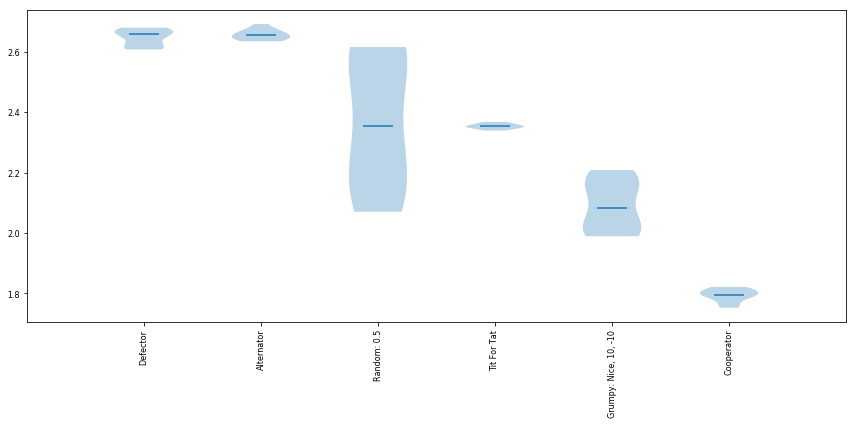

In [17]:
#NBVAL_IGNORE_OUTPUT
plot = axl.Plot(results)
p = plot.boxplot()
p.show();

EXERCISE
--------

Create your own tournament using any five players from the library.

Futhermore, look at the ranked names and plot the scores.

Summary
--------

This section has discussed:

- Creating a match
- and creating various tournaments.

In the next section we will send some time looking at what is called the human strategy.